## Milestone Project 1

Mixed Precision Training - using 16 bit or 32 bit precision in order to make compute faster.
GPU compute capability should be 7.0 or above
GPU that works with Mixed Precision:
- T4
- A100
- V100

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

### Check GPU

Tesla T4

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-2b536bf9-4def-62be-5223-009c26734430)


In [ ]:
!nvidia-smi

Thu Jun 29 05:12:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# helper function
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-29 09:09:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-29 09:09:21 (103 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
from helper_functions import plot_loss_curves, create_tensorboard_callback, unzip_data, compare_historys, confusion_matrix

##Use Tensorflow Datasets(TFDS)

In [ ]:
# Get Tensorflow Datasets
import tensorflow_datasets as tfds

In [ ]:
# List all avialble datasets
dataset_list = tfds.list_builders()
dataset_list

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [ ]:
print("food101" in dataset_list)

True


In [ ]:
# load in the dataset
(train_data, test_data), ds_info = tfds.load(name='food101',
                                             split=['train', 'validation'],
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteAAPZSH/food101-train.tfrecord*...:   0%|          …

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/food101/2.0.0.incompleteAAPZSH/food101-validation.tfrecord*...:   0%|     …

Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

,image,label
0,,70 (pad_thai)
1,,3 (beef_carpaccio)
2,,37 (filet_mignon)
3,,85 (samosa)
4,,56 (huevos_rancheros)

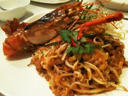
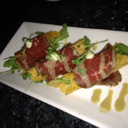
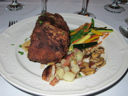
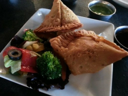
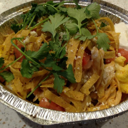

In [ ]:
tfds.as_dataframe(train_data.take(5), ds_info)

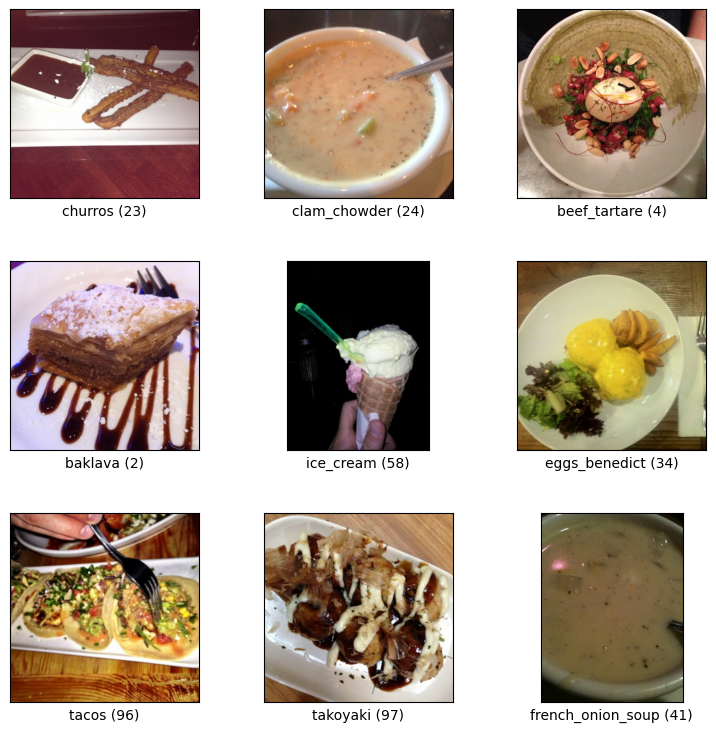

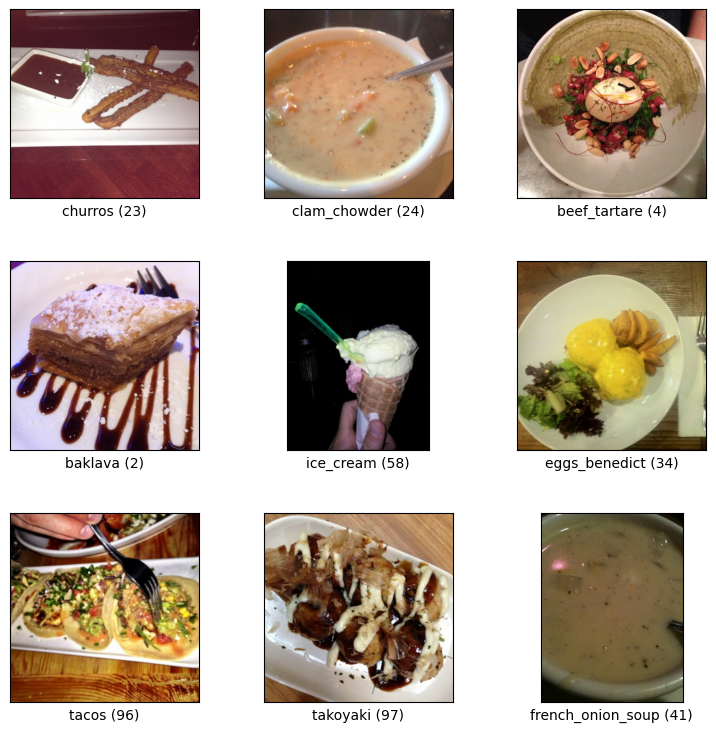

In [ ]:
# Show examples
tfds.show_examples(train_data, ds_info)

In [ ]:
ds_info

tfds.core.DatasetInfo(
    name='food101',
    full_name='food101/2.0.0',
    description="""
    This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
    """,
    homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
    data_path='/root/tensorflow_datasets/food101/2.0.0',
    file_format=tfrecord,
    download_size=4.65 GiB,
    dataset_size=4.77 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo n

In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [ ]:
ds_info.features['label'].names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

### Exploring the Food101 data from TensorFlow Datasets

Now we've downloaded the Food101 dataset from TensorFlow Datasets, how about we do what any good data explorer should?

In other words, "visualize, visualize, visualize".

Let's find out a few details about our dataset:
* The shape of our input data (image tensors)
* The datatype of our input data
* What the labels of our input data look like (e.g. one-hot encoded versus label-encoded)
* Do the labels match up with the class names?

To do, let's take one sample off the training data (using the [`.take()` method](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take)) and explore it.

In [ ]:
class_names = ds_info.features['label'].names

In [ ]:
sample = train_data.take(1)

In [ ]:
sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
len(sample)

1

In [ ]:
for image, label in sample:
    print(f"Image Shape: {image.shape}")
    print(f"Image data type: {image.dtype}")
    print(f"label: {label}")
    print(f"Class name: {class_names[label.numpy()]}")

Image Shape: (512, 512, 3)
Image data type: <dtype: 'uint8'>
label: 77
Class name: pork_chop


In [ ]:
# WHat does our image look like?
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 64,  27,  11],
        [ 73,  36,  20],
        [ 83,  46,  28],
        ...,
        [150, 105,  82],
        [138,  93,  72],
        [134,  89,  68]],

       [[ 69,  32,  16],
        [ 70,  33,  17],
        [ 72,  35,  17],
        ...,
        [155, 110,  87],
        [141,  96,  75],
        [135,  90,  69]],

       [[ 71,  35,  19],
        [ 65,  29,  13],
        [ 61,  26,   7],
        ...,
        [162, 118,  93],
        [144, 102,  78],
        [137,  95,  71]],

       ...,

       [[210,  82,  21],
        [208,  80,  19],
        [205,  77,  14],
        ...,
        [223, 172, 115],
        [226, 175, 118],
        [224, 173, 116]],

       [[199,  71,   8],
        [199,  71,   8],
        [198,  70,   7],
        ...,
        [224, 173, 116],
        [226, 175, 118],
        [223, 172, 115]],

       [[204,  76,  13],
        [204,  76,  13],
        [203,  75,  12],
        ...,
        [225, 174, 11

In [ ]:
# what are the min and max vlaues in theimage?
import tensorflow as tf
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

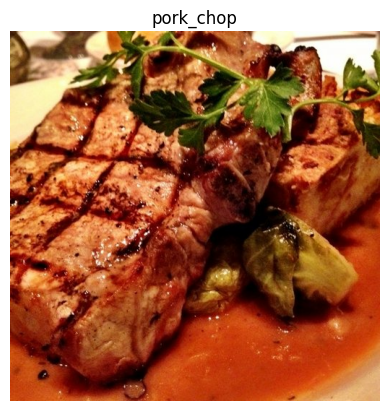

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)
plt.show()

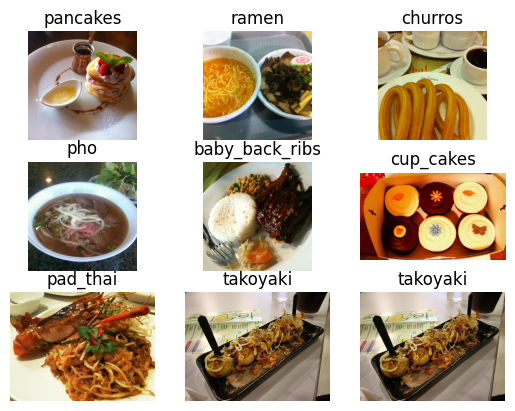

In [ ]:
# Viewing some more images
for i in range(9):
    for image, label in train_data.take(1):
        plt.subplot(3, 3, i+1)
        plt.imshow(image)
        plt.title(class_names[label.numpy()])
        plt.axis(False)

In [ ]:
train_data.take(3)

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

## Create preprocessing functions for our data

In previous notebooks, when our images were in folder format we used the method [`tf.keras.utils.image_dataset_from_directory()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) to load them in.

Doing this meant our data was loaded into a format ready to be used with our models.

However, since we've downloaded the data from TensorFlow Datasets, there are a couple of preprocessing steps we have to take before it's ready to model.

More specifically, our data is currently:

* In `uint8` data type
* Comprised of all differnet sized tensors (different sized images)
* Not scaled (the pixel values are between 0 & 255)

Whereas, models like data to be:

* In `float32` data type
* Have all of the same size tensors (batches require all tensors have the same shape, e.g. `(224, 224, 3)`)
* Scaled (values between 0 & 1), also called normalized

To take care of these, we'll create a `preprocess_img()` function which:

* Resizes an input image tensor to a specified size using [`tf.image.resize()`](https://www.tensorflow.org/api_docs/python/tf/image/resize)
* Converts an input image tensor's current datatype to `tf.float32` using [`tf.cast()`](https://www.tensorflow.org/api_docs/python/tf/cast)

> 🔑 **Note:** Pretrained EfficientNetBX models in [`tf.keras.applications.efficientnet`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet) (what we're going to be using) have rescaling built-in. But for many other model architectures you'll want to rescale your data (e.g. get its values between 0 & 1). This could be incorporated inside your "`preprocess_img()`" function (like the one below) or within your model as a [`tf.keras.layers.Rescaling`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling) layer.

In [ ]:
# we would not scale as we are using EfficientNet which already has rescaling built in it
# functon to preprocess the image

def preprocess_img(image, label, img_shape=224):

    img = tf.image.resize(image, [img_shape, img_shape])
    return tf.cast(img, 'float32'), label

In [ ]:
print(f"IMAGE BEFORE PREPROCESSING")
print(f"Image\n{image}")
print(f"Image shape: {image.shape}\nImage dtype:{image.dtype}")
print()
print(f"IMAGE AFTER PREPROCESSING...")
img, l = preprocess_img(image, label, img_shape=224)
print(f"Preprocessed image:\n{img}")
print(f"Preprocessed image shape: {img.shape}\nPreprocessed image dtype:{img.dtype}")


IMAGE BEFORE PREPROCESSING
Image
[[[199 100  15]
  [192  91   9]
  [202  95  23]
  ...
  [238 196 124]
  [237 195 123]
  [236 194 122]]

 [[210 110  25]
  [207 105  23]
  [194  86  13]
  ...
  [238 196 124]
  [236 194 122]
  [235 193 121]]

 [[205 103  18]
  [213 108  25]
  [196  86  11]
  ...
  [238 195 126]
  [237 194 125]
  [235 192 123]]

 ...

 [[ 95  28  11]
  [ 94  27  10]
  [ 84  17   0]
  ...
  [166  32   5]
  [166  32   3]
  [167  34   1]]

 [[ 87  24   7]
  [ 83  18   0]
  [ 87  20   1]
  ...
  [155  27   0]
  [164  39   9]
  [156  33   0]]

 [[ 83  21   6]
  [ 79  16   0]
  [ 85  19   0]
  ...
  [149  25   0]
  [157  36   5]
  [149  30   0]]]
Image shape: (306, 512, 3)
Image dtype:<dtype: 'uint8'>

IMAGE AFTER PREPROCESSING...
Preprocessed image:
[[[196.98405     96.515305    13.443877  ]
  [185.15625     75.776146    10.615431  ]
  [176.09981     62.711414     9.320153  ]
  ...
  [237.2455     192.6027     122.24549   ]
  [238.         196.         124.        ]
  [236.459

In [ ]:
## batching and preparing our dataset to run faster
## previously we use ImageDataGenerator/flow_from_directory methods, then its newer version image_dataset_from_directory
## we are now going to make our data pipeline really faster

In [ ]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

In [ ]:
# Map preprocessing function to training data (and paralellize)
train_data = train_data.map(map_func=preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle train_data and turn it into batches and prefetch it (load it faster)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map prepreprocessing function to test data
test_data = test_data.map(preprocess_img, num_parallel_calls=tf.data.AUTOTUNE)
# Turn test data into batches (don't need to shuffle)
test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_data, test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Create Model callbacks


In [ ]:
#create checkpoint callback
filepath = 'model_checkpoints/cp.ckpt'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath,
                                                      monitor='val_accuracy', # monitor validation accuracy
                                                      save_best_only=True, # save the best weights only
                                                      save_weights_only=True, # save only weights
                                                      verbose=0)

## Setup Mixed Precision

In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


In [ ]:
mixed_precision.global_policy()

<Policy "mixed_float16">

## Feature Extraction model

In [ ]:
class_names = ds_info.features['label'].names
n_classes = len(class_names)
n_classes

101

In [ ]:
class_names = train_data.names

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

input_shape= (224,224,3)
inputs = tf.keras.layers.Input(shape=input_shape, name='input_layer')
# x = tf.keras.experimental.layers.Rescaling(1./255.)(inputs)
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling')(x)
x = tf.keras.layers.Dense(n_classes)(x)
outputs = tf.keras.layers.Activation('softmax', dtype=tf.float32, name='softmax_float32')(x)
model=tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 dense (Dense)               (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

In [ ]:
for layer in model.layers:
    print(layer.name,'|', layer.trainable,'|', layer.dtype, '|', layer.dtype_policy)

input_layer | True | float32 | <Policy "float32">
efficientnetb0 | False | float32 | <Policy "mixed_float16">
global_average_pooling | True | float32 | <Policy "mixed_float16">
dense | True | float32 | <Policy "mixed_float16">
softmax_float32 | True | float32 | <Policy "float32">


In [ ]:
for layer in base_model.layers[:10]:
  print(layer.name,'|', layer.trainable,'|', layer.dtype, '|', layer.dtype_policy)

input_2 | False | float32 | <Policy "float32">
rescaling_2 | False | float32 | <Policy "mixed_float16">
normalization_1 | False | float32 | <Policy "mixed_float16">
rescaling_3 | False | float32 | <Policy "mixed_float16">
stem_conv_pad | False | float32 | <Policy "mixed_float16">
stem_conv | False | float32 | <Policy "mixed_float16">
stem_bn | False | float32 | <Policy "mixed_float16">
stem_activation | False | float32 | <Policy "mixed_float16">
block1a_dwconv | False | float32 | <Policy "mixed_float16">
block1a_bn | False | float32 | <Policy "mixed_float16">


In [ ]:
tensorboard_callback = create_tensorboard_callback('transfer_learning', experiment_name='Food101_EfficientNetB0_feature_extraction')

initial_epochs = 3

history_fe = model.fit(train_data,
                       epochs=initial_epochs,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps = int(0.15 * len(test_data)),
                       callbacks=[model_checkpoint, tensorboard_callback])

In [ ]:
# evaluate on whole test data
results_feature_extract_model = model.evaluate(test_data)
results_feature_extract_model

## Save the whole model to file

In [ ]:
## Save the model
model.save('model_fe')

In [ ]:
# Load model previously saved above
loaded_model = tf.keras.models.load_model('model_fe')

In [ ]:
# Check the layers in the base model and see what dtype policy they're using
for layer in loaded_model.layers[2].layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

In [ ]:
# Check loaded model performance (this should be the same as results_feature_extract_model)
results_loaded_model = loaded_model.evaluate(test_data)
results_loaded_model

In [ ]:
results_feature_extract_model

In [ ]:
# The loaded model's results should equal (or at least be very close) to the model's results prior to saving
# Note: this will only work if you've instatiated results variables

np.isclose(results_feature_extract_model[1], results_loaded_model[1])

## Preparing our model's layers for fine-tuning

Next: Fine-tune the feature extraction model to beat the [DeepFood paper](https://arxiv.org/pdf/1606.05675.pdf).

Like all good cooking shows, I've saved a model I prepared earlier (the feature extraction model from above) to Google Storage.

You can download it to make sure you're using the same model as originall trained going forward.

In [ ]:
# Download the saved model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip

--2023-06-29 10:41:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/07_efficientnetb0_feature_extract_model_mixed_precision.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.174.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.174.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16976857 (16M) [application/zip]
Saving to: ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’

07_efficientnetb0_f 100%[===================>]  16.19M  11.7MB/s    in 1.4s    

2023-06-29 10:41:29 (11.7 MB/s) - ‘07_efficientnetb0_feature_extract_model_mixed_precision.zip’ saved [16976857/16976857]



In [ ]:
# Unzip the SavedModel downloaded from Google Stroage
!mkdir downloaded_gs_model # create new dir to store downloaded feature extraction model
!unzip 07_efficientnetb0_feature_extract_model_mixed_precision.zip -d downloaded_gs_model

Archive:  07_efficientnetb0_feature_extract_model_mixed_precision.zip
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.data-00000-of-00001  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/variables/variables.index  
  inflating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/saved_model.pb  
   creating: downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision/assets/


In [ ]:
# Load and evaluate downloaded GS model
downloaded_model_fe = tf.keras.models.load_model('/content/downloaded_gs_model/07_efficientnetb0_feature_extract_model_mixed_precision')
results_downloaded_model = downloaded_model_fe.evaluate(test_data)

251/790 [========>.....................] - ETA: 1:32:42 - loss: nan - accuracy: 0.0080

In [ ]:
results_downloaded_model

In [ ]:
# Get a summary of the downloaded model
downloaded_model_fe.summary()

In [ ]:
# Set all of the layers .trainable variable in the loaded model to True (so they're unfrozen)
base_model.trainable=True
# for layer in downloaded_model_fe.layers[2].layers:
#     layer.trainable=True

In [ ]:
# Check to see what dtype_policy of the layers in your loaded model are
for layer in downloaded_model_fe.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

In [ ]:
for layer in base_model.layers:
    print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

In [ ]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
# Monitor the val_loss and stop training if it doesn't improve for 3 epochs
# See: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping for more
# YOUR_CODE_HERE
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


# Create ModelCheckpoint callback to save best model during fine-tuning
# Save the best model only
# Monitor val_loss while training and save the best model (lowest val_loss)
# See: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint for more
# YOUR_CODE_HERE
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath,
                                                      save_best_only=True,
                                                      monitor='val_loss')

tensorboard_callback = create_tensorboard_callback('transfer_learning', experiment_name='Food_101_EfficientNetB0_Fine_Tuning')

In [ ]:
# Compile the model ready for fine-tuning
# Use the Adam optimizer with a 10x lower than default learning rate
# YOUR_CODE_HERE
downloaded_model_fe.compile(loss='sparse_categorical_crossentropy',
                            optimizer=tf.keras.optimizers.Adam(0.0001),
                            metrics=['accuracy'])

In [ ]:
# Start to fine-tune (all layers)
# Use 100 epochs as the default
# Validate on 15% of the test_data
# Use the create_tensorboard_callback, ModelCheckpoint and EarlyStopping callbacks you created eaelier
# YOUR_CODE_HERE
fine_tune_epochs=100
history_fine_tuned = downloaded_model_fe.fit(train_data,
                                             epochs=fine_tune_epochs,
                                             steps_per_epochs=len(train_data),
                                             validation_data=test_data,
                                             validation_steps=int(0.15 * len(test_data)),
                                             callbacks = [model_checkpoint, early_stopping, tensorboard_callback])

In [ ]:
# Save model locally (note: if you're using Google Colab and you save your model locally, it will be deleted when your Google Colab session ends)
downloaded_model_fe.save('fine_tuned_EffNetB0')

In [ ]:
# Evaluate mixed precision trained fine-tuned model (this should beat DeepFood's 77.4% top-1 accuracy)
result_fine_tuned_model = downloaded_model_fe.evaluate(test_data)

## View training results on TensorBoard

In [ ]:
!tensorboard dev upload --logdir 'transfer_learning' \
  --name 'Food101 EfficientNetB0 FE and fine tuning' \
  --description 'An experiment use pretrained model EfficientNetB0 to peform classification of Food101 dataset'

In [ ]:
!tensorboard dev list

## Evaluate Trained Model

- accuarcy score using sklearn
- confusion matrix
- classification report as pandas dataframe
- evaluate classes where model is performing great and where worse

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
#Define y_true, and y_preds
y_labels = [label for image,label in test_data.unbatch()]
preds_probs = downloaded_model_fe.predict(test_data)

In [ ]:
## accuarcy score

